<a href="https://colab.research.google.com/github/mkerimbay/Machine-Learning/blob/master/kNN_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## kNN on Iris Dataset

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

In [2]:
#reading data from the csv file
# data = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
data = pd.read_csv('iris.csv')

data = data.rename(columns={'sepal.length': 'sepal_length',
                            'sepal.width': 'sepal_width',
                            'petal.length': 'petal_length',
                            'petal.width': 'petal_width',
                            'variety': 'class'})
print(data)

     sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


### Part a)
Dividing the dataset as development and test.

In [3]:
#randomize the indices
indices = np.random.permutation(data.shape[0])
div = int(0.75 * len(indices))
development_id, test_id = indices[:div], indices[div:]
#dividing the dataset using randomized indices
development_set, test_set = data.loc[development_id,:], data.loc[test_id,:]
print("Development Set:\n", development_set, "\n\nTest Set:\n", test_set)
mean_development_set = development_set.mean(numeric_only=True)
mean_test_set = test_set.mean(numeric_only=True)
std_development_set = development_set.std(numeric_only=True)
std_test_set = test_set.std(numeric_only=True)

Development Set:
      sepal_length  sepal_width  petal_length  petal_width       class
114           5.8          2.8           5.1          2.4   Virginica
142           5.8          2.7           5.1          1.9   Virginica
85            6.0          3.4           4.5          1.6  Versicolor
9             4.9          3.1           1.5          0.1      Setosa
131           7.9          3.8           6.4          2.0   Virginica
..            ...          ...           ...          ...         ...
74            6.4          2.9           4.3          1.3  Versicolor
55            5.7          2.8           4.5          1.3  Versicolor
47            4.6          3.2           1.4          0.2      Setosa
29            4.7          3.2           1.6          0.2      Setosa
148           6.2          3.4           5.4          2.3   Virginica

[112 rows x 5 columns] 

Test Set:
      sepal_length  sepal_width  petal_length  petal_width       class
141           6.9          3.1     

### Part b)
Implement kNN using the following hyperparameters:
##### number of neighbor
        * 1,3,5,7
##### distance metric
        * euclidean distance
        * normalized euclidean distance
        * cosine similarity

Retrieving the 'class' column from the development and test sets and storing it in separate lists. Calculating the mean and standard deviation of the development set and test set for normalizing the data.

In [4]:
test_class = list(test_set.iloc[:,-1])
dev_class = list(development_set.iloc[:,-1])
mean_development_set = development_set.mean(numeric_only=True)
mean_test_set = test_set.mean(numeric_only=True)
std_development_set = development_set.std(numeric_only=True)
std_test_set = test_set.std(numeric_only=True)

Functions for computing the Euclidean Distance, Normalized Euclidean Distance, Cosine Similarity and k Nearest Neighbor to determine the 'class' for a given input instance.

In [5]:
def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

# Title: Cosine Similarty between 2 Number Lists
# Author: dontloo
# Date: 03.27.2017
# Code version: 1
# Availability: https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists
def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)

def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Setosa" : 0, "Versicolor" : 0, "Virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

### Part c)
Using the development data set

Iterating all of the development data points and computing the class for each k and each distance metric

In [6]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list = []
for index, rows in development_set.iterrows():
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list.append([my_list])
# k values for the number of neighbors that need to be considered
k_n = [1, 3, 5, 7]
# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean', 'cosine']
# Performing kNN on the development set by iterating all of the development set data points and for each k and each distance metric
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(development_set, pd.DataFrame(row_list[i]), k, dist_method, mean_development_set, std_development_set))
        development_set_obs_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each k and each distance metric (obs_k of the form obs_k[dist_method][k])
    obs_k[dist_method] = development_set_obs_k
    print(dist_method.upper() + " distance method performed on the dataset for all k values!")
#print(obs_k)

EUCLIDEAN distance method performed on the dataset for all k values!
NORMALIZED_EUCLIDEAN distance method performed on the dataset for all k values!
COSINE distance method performed on the dataset for all k values!


Computing the accuracy for the development data set and finding the optimal hyperparametes

   k  euclidean  normalized_euclidean    cosine
0  1   1.000000              1.000000  1.000000
1  3   0.955357              0.946429  0.982143
2  5   0.955357              0.946429  0.973214
3  7   0.964286              0.973214  0.964286



Best k value is 3 and best distance metric is cosine . Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting


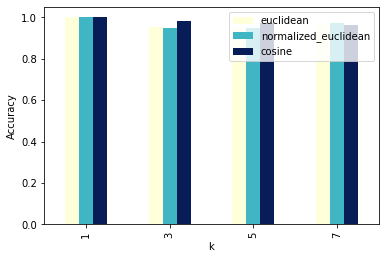

In [7]:
# Calculating the accuracy of the development set by comparing it with the development set 'class' list created earlier
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)

# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=['euclidean', 'normalized_euclidean', 'cosine'], kind="bar", colormap='YlGnBu')
draw.set(ylabel='Accuracy')

# Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting
df_res.loc[df_res['k'] == 1.0, ['euclidean', 'normalized_euclidean', 'cosine']] = np.nan

df_res
# Fetching the best k value for using all hyper-parameters
# In case the accuracy is the same for different k and different distance metric selecting the first of all the same
column_val = [c for c in df_res.columns if not c.startswith('k')]
# col_max = df_res[column_val].max().idxmax(1)
col_max = df_res[column_val].max().idxmax()
col_max

best_dist_method = col_max
row_max = df_res[col_max].argmax()
best_k = int(df_res.iloc[row_max]['k'])
if df_res.isnull().values.any():
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m. Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting')
else:
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m.')

### Part d)
Using the test dataset

In [8]:
print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m')




Best k value is 3 and best distance metric is cosine 


Using the best k value and best distance metric to determine the class for all rows in the test dataset

In [9]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list_test = []
for index, rows in test_set.iterrows(): 
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list_test.append([my_list])
test_set_obs = []
for i in range(len(row_list_test)):
    test_set_obs.append(knn(test_set, pd.DataFrame(row_list_test[i]), best_k, best_dist_method, mean_test_set, std_test_set))
#print(test_set_obs)

count = 0
for i,j in zip(test_class, test_set_obs):
    if i == j:
        count = count + 1
    else:
        pass
accuracy_test = count/(len(test_class))
print('Final Accuracy of the Test dataset is ', accuracy_test)

Final Accuracy of the Test dataset is  1.0


In [10]:
# Final accuracy of the test dataset gives 1.0, which is all predictions are correct!

### References

https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists - for cosine similarity

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/ - for nearest neighbors

In [11]:
from sklearn import metrics

In [12]:
metrics.confusion_matrix(test_class, test_set_obs)

array([[15,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 14]])

In [13]:
# it will be obvious that once we have accuracy of 1, gives this kind of matrix, and precision, recall and f1-score will also be 1

In [14]:
print(metrics.classification_report(test_class, test_set_obs))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        15
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

